# Instructor Demo: Returns

This program reads daily stock data from a CSV, trims extraneous columns, converts date strings to datetime objects, sets the datetimes as the index, and calculates and plots returns for a specified date range.

Equation: $r=\frac{{p_{t}} - {p_{0}}}{p_{0}}$

Where $r$ is return on investment, ${p_{t}}$ is the price at time $t$, and ${p_{0}}$ is the initial price

In [2]:
# Initial imports
import pandas as pd
%matplotlib inline

### Calculating ROI

In [3]:
# ROI = (Current Value of Investment - Cost of Investment) / Cost of Investment
initial_investment = 100
current_price = 110

roi = (current_price - initial_investment) / initial_investment
roi_pct = roi * 100
print(f"ROI for an initial investment of ${initial_investment} "
      f"now priced at ${current_price} "
      f"is {roi} or {roi_pct}%")

ROI for an initial investment of $100 now priced at $110 is 0.1 or 10.0%


### Read CSV in as DataFrame

In [6]:
# Read in the CSV as a DataFrame
tsx_csv = pd.read_csv("../Resources/TSX_Data.csv")
tsx_csv.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/4/2010 16:00:00,11847.34,11872.15,11746.11,11866.90,11866.90,132670512
1,1/5/2010 16:00:00,11900.01,11935.24,11837.23,11888.08,11888.08,167798256
2,1/6/2010 16:00:00,11912.88,11971.62,11888.08,11944.54,11944.54,194400880
3,1/7/2010 16:00:00,11925.03,11944.54,11819.50,11887.51,11887.51,190573664
4,1/8/2010 16:00:00,11883.26,11953.83,11863.13,11953.83,11953.83,167761216


### View Summary Statistics

In [7]:
# Use the 'describe()' function
tsx_csv.describe(include="all")

,Date,Open,High,Low,Close,Adj Close,Volume
count,2504,2504.000000,2504.000000,2504.000000,2504.000000,2504.000000,2.504000e+03
unique,2504,NaN,NaN,NaN,NaN,NaN,NaN
top,1/4/2010 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14053.061605,14108.935847,13988.009397,14051.310635,14051.310635,2.007137e+08
std,NaN,1578.164466,1567.954329,1589.280565,1577.154815,1577.154815,6.436398e+07
min,NaN,11049.740000,11192.370000,10848.190000,11092.500000,11092.500000,0.000000e+00
25%,NaN,12572.700000,12636.362500,12506.995000,12579.027500,12579.027500,1.634933e+08
50%,NaN,14150.665000,14196.720000,14066.055000,14132.920000,14132.920000,1.920928e+08
75%,NaN,15371.687500,15421.482500,15313.100000,15367.960000,15367.960000,2.254997e+08


### Drop Extra Columns

In [8]:
# Drop unnecessary columns
tsx_csv = tsx_csv.drop(columns=["Open", "High", "Low", "Close", "Volume"])
tsx_csv.head()

,Date,Adj Close
0,1/4/2010 16:00:00,11866.90
1,1/5/2010 16:00:00,11888.08
2,1/6/2010 16:00:00,11944.54
3,1/7/2010 16:00:00,11887.51
4,1/8/2010 16:00:00,11953.83


### Set Date as Index

In [9]:
# Set the date as the index to the DataFrame
tsx_csv = tsx_csv.set_index(pd.to_datetime(tsx_csv["Date"], infer_datetime_format=True))
tsx_csv.head()

,Date,Adj Close
Date,,
2010-01-04 16:00:00,1/4/2010 16:00:00,11866.90
2010-01-05 16:00:00,1/5/2010 16:00:00,11888.08
2010-01-06 16:00:00,1/6/2010 16:00:00,11944.54
2010-01-07 16:00:00,1/7/2010 16:00:00,11887.51
2010-01-08 16:00:00,1/8/2010 16:00:00,11953.83


### Drop Extra Date Column

In [10]:
# Drop the extra date column
tsx_csv = tsx_csv.drop(columns=["Date"])
tsx_csv.head()

,Adj Close
Date,
2010-01-04 16:00:00,11866.90
2010-01-05 16:00:00,11888.08
2010-01-06 16:00:00,11944.54
2010-01-07 16:00:00,11887.51
2010-01-08 16:00:00,11953.83


### Plot Daily Close

<AxesSubplot:xlabel='Date'>

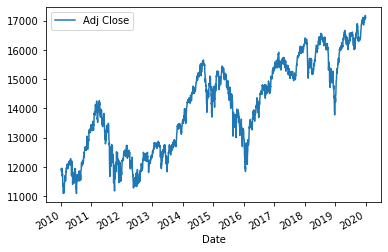

In [11]:
# Plot the daily closing stock price of the S&P 500 over the last 5 years
tsx_csv.plot()

### Calculate Daily Returns (Method 1)

Equation: $r=\frac{{p_{t}} - {p_{t-1}}}{p_{t-1}}$

Where $r$ is daily returns, ${p_{t}}$ is the price at time $t$, and ${p_{t-1}}$ is the price at $t-1$ (offset by 1).

In [12]:
# Calculate the daily return using the 'shift()' function
daily_returns = (tsx_csv - tsx_csv.shift(1)) / tsx_csv.shift(1)
daily_returns.head()

,Adj Close
Date,
2010-01-04 16:00:00,NaN
2010-01-05 16:00:00,0.001785
2010-01-06 16:00:00,0.004749
2010-01-07 16:00:00,-0.004775
2010-01-08 16:00:00,0.005579


In [13]:
tsx_csv.shift(1)

,Adj Close
Date,
2010-01-04 16:00:00,NaN
2010-01-05 16:00:00,11866.90
2010-01-06 16:00:00,11888.08
2010-01-07 16:00:00,11944.54
2010-01-08 16:00:00,11887.51
...,...
2019-12-20 16:00:00,17064.04
2019-12-23 16:00:00,17118.44
2019-12-24 13:30:00,17128.71


In [14]:
tsx_csv

,Adj Close
Date,
2010-01-04 16:00:00,11866.90
2010-01-05 16:00:00,11888.08
2010-01-06 16:00:00,11944.54
2010-01-07 16:00:00,11887.51
2010-01-08 16:00:00,11953.83
...,...
2019-12-20 16:00:00,17118.44
2019-12-23 16:00:00,17128.71
2019-12-24 13:30:00,17180.15


### Calculate Daily Returns (Method 2)

In [10]:
# Calculate the daily return using the 'pct_change()' function
daily_returns = tsx_csv.pct_change()
daily_returns.head()

,Adj Close
Date,
2010-01-04 16:00:00,NaN
2010-01-05 16:00:00,0.001785
2010-01-06 16:00:00,0.004749
2010-01-07 16:00:00,-0.004775
2010-01-08 16:00:00,0.005579


### Plot Daily Returns

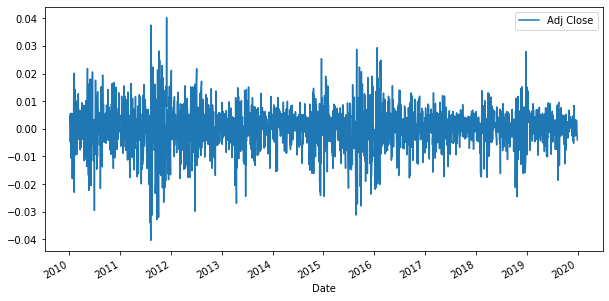

In [11]:
# Plot the daily returns of the S&P TSX Index over the last 5 years
daily_returns.plot(figsize=(10,5))

### Calculate Cumulative Returns

In [12]:
# Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.head()

,Adj Close
Date,
2010-01-04 16:00:00,NaN
2010-01-05 16:00:00,1.001785
2010-01-06 16:00:00,1.006543
2010-01-07 16:00:00,1.001737
2010-01-08 16:00:00,1.007325


### Plot Cumulative Returns

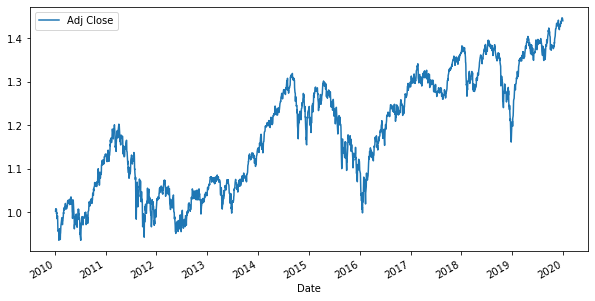

In [13]:
# Plot the daily returns of the S&P TSX Index over the last 5 years
cumulative_returns.plot(figsize=(10,5))